In [9]:
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
import numpy as np

In [10]:
data = pd.read_csv("archive (5)/Train.csv")

In [11]:
data.head(20)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
5,FDP36,10.395,Regular,0.000000,Baking Goods,51.4008,OUT018,2009,Medium,Tier 3,Supermarket Type2,556.6088
6,FDO10,13.650,Regular,0.012741,Snack Foods,57.6588,OUT013,1987,High,Tier 3,Supermarket Type1,343.5528
7,FDP10,NaN,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636
8,FDH17,16.200,Regular,0.016687,Frozen Foods,96.9726,OUT045,2002,NaN,Tier 2,Supermarket Type1,1076.5986
9,FDU28,19.200,Regular,0.094450,Frozen Foods,187.8214,OUT017,2007,NaN,Tier 2,Supermarket Type1,4710.5350


In [12]:
data.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [14]:
data.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [15]:
data.size

102276

In [16]:
data.shape

(8523, 12)

In [17]:
data.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [18]:
def show_value_count(pos):
    col = data.columns[pos]
    print(col)
    dc = data[col]
    if dc.dtypes=="O":
        print(dc.value_counts())
    else:
        print("not category colunm")    

In [48]:
show_value_count(0)

AttributeError: 'numpy.ndarray' object has no attribute 'columns'

In [20]:
show_value_count(1)

Item_Weight
not category colunm


In [21]:
show_value_count(2)

Item_Fat_Content
Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64


In [22]:
data[data.columns[2]] = data[data.columns[2]].map({"LF":1,"reg":2,"low fat":1,"Low Fat":1,"Regular":2})

In [23]:
show_value_count(4)

Item_Type
Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64


In [24]:
show_value_count(6)

Outlet_Identifier
OUT027    935
OUT013    932
OUT049    930
OUT046    930
OUT035    930
OUT045    929
OUT018    928
OUT017    926
OUT010    555
OUT019    528
Name: Outlet_Identifier, dtype: int64


In [25]:
show_value_count(7)

Outlet_Establishment_Year
not category colunm


In [26]:
show_value_count(8)

Outlet_Size
Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64


In [27]:
show_value_count(9)

Outlet_Location_Type
Tier 3    3350
Tier 2    2785
Tier 1    2388
Name: Outlet_Location_Type, dtype: int64


In [28]:
show_value_count(10)

Outlet_Type
Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: Outlet_Type, dtype: int64


In [29]:
show_value_count(11)

Item_Outlet_Sales
not category colunm


In [30]:
from sklearn import preprocessing


In [31]:
df = data.copy()
print("Outlet_Size na value ",df.Outlet_Size.isna().sum())


Outlet_Size na value  2410


In [32]:
df.Outlet_Size.fillna(df.Outlet_Size.mode()[0],inplace=True)
df.Outlet_Size.head()

0    Medium
1    Medium
2    Medium
3    Medium
4      High
Name: Outlet_Size, dtype: object

In [33]:
for c in data.columns:
    if data[c].dtype=='O':
        label_encoder = preprocessing.LabelEncoder()
        df[c]= label_encoder.fit_transform(df[c])




In [34]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,156,9.30,1,0.016047,4,249.8092,9,1999,1,0,1,3735.1380
1,8,5.92,2,0.019278,14,48.2692,3,2009,1,2,2,443.4228
2,662,17.50,1,0.016760,10,141.6180,9,1999,1,0,1,2097.2700
3,1121,19.20,2,0.000000,6,182.0950,0,1998,1,2,0,732.3800
4,1297,8.93,1,0.000000,9,53.8614,1,1987,0,2,1,994.7052


In [35]:
df.Item_Weight.unique()

array([ 9.3  ,  5.92 , 17.5  , 19.2  ,  8.93 , 10.395, 13.65 ,    nan,
       16.2  , 11.8  , 18.5  , 15.1  , 17.6  , 16.35 ,  9.   , 13.35 ,
       18.85 , 14.6  , 13.85 , 13.   ,  7.645, 11.65 ,  5.925, 19.25 ,
       18.6  , 18.7  , 17.85 , 10.   ,  8.85 ,  9.8  , 13.6  , 21.35 ,
       12.15 ,  6.42 , 19.6  , 15.85 ,  7.39 , 10.195,  9.895, 10.895,
        7.905,  9.195,  8.365,  7.97 , 17.7  , 19.35 ,  8.645, 15.6  ,
       18.25 ,  7.855,  7.825,  8.39 , 12.85 , 19.   ,  5.905,  7.76 ,
       16.75 , 15.5  ,  6.055,  6.305, 20.85 , 20.75 ,  8.895, 19.7  ,
        8.75 , 13.3  ,  8.31 , 19.75 , 17.1  , 10.5  ,  6.635, 14.15 ,
        8.89 ,  9.1  ,  7.5  , 16.85 ,  7.485, 11.6  , 12.65 , 20.25 ,
        8.6  , 12.6  ,  8.88 , 20.5  , 13.5  ,  7.235,  6.92 ,  8.02 ,
       12.8  , 16.6  , 14.   , 16.   , 21.25 ,  7.365, 18.35 ,  5.465,
        7.27 ,  6.155, 19.5  , 15.2  , 14.5  , 13.1  , 12.3  , 11.1  ,
       11.3  ,  5.75 , 11.35 ,  6.525, 10.3  ,  5.78 , 11.85 , 18.75 ,
      

In [36]:
df.Item_Weight.fillna(df.Item_Weight.mean(),inplace=True)

In [37]:
df.Item_Weight.isna().sum()

0

In [38]:
df.Item_Weight[7]

12.857645184135976

In [39]:
df.Outlet_Type.unique()

array([1, 2, 0, 3])

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   int32  
 1   Item_Weight                8523 non-null   float64
 2   Item_Fat_Content           8523 non-null   int64  
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   int32  
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   int32  
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                8523 non-null   int32  
 9   Outlet_Location_Type       8523 non-null   int32  
 10  Outlet_Type                8523 non-null   int32  
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int32(6), int64(2)
memory usage: 599.4 KB


In [41]:
df.isna().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [42]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X = df[df.columns[:-1]]
y = df[df.columns[-1]]
data = scaler.fit_transform(X)

X = pd.DataFrame(data,columns=X.columns)
y.shape

(8523,)

[0.214448 0.115591 0.10714  0.094227 0.092479 0.092055 0.087695 0.073307
 0.072971 0.041756]
0.9916690286472049


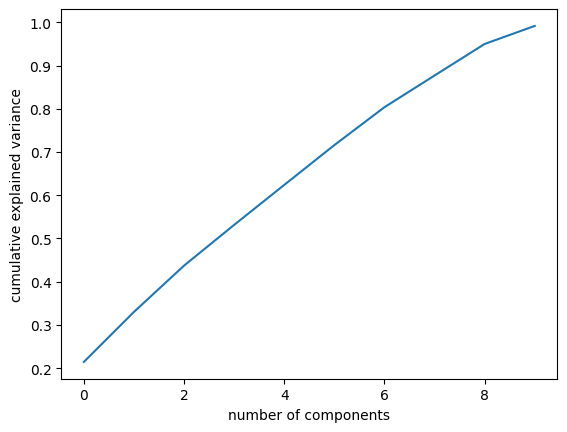

In [43]:
from sklearn.decomposition import PCA
pca = PCA(n_components=10)  # I have selected 7 components to test as main features

X = pca.fit_transform(X)
print(pca.explained_variance_ratio_.round(6))
print(pca.explained_variance_ratio_.sum())
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');


In [44]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.33,random_state=8)
reg = LinearRegression()

reg.fit(X_train,y_train)
p = reg.predict(X_test)
r2_score(y_test,y_pred=p)



NameError: name 'r2_score' is not defined

# Outlier detection

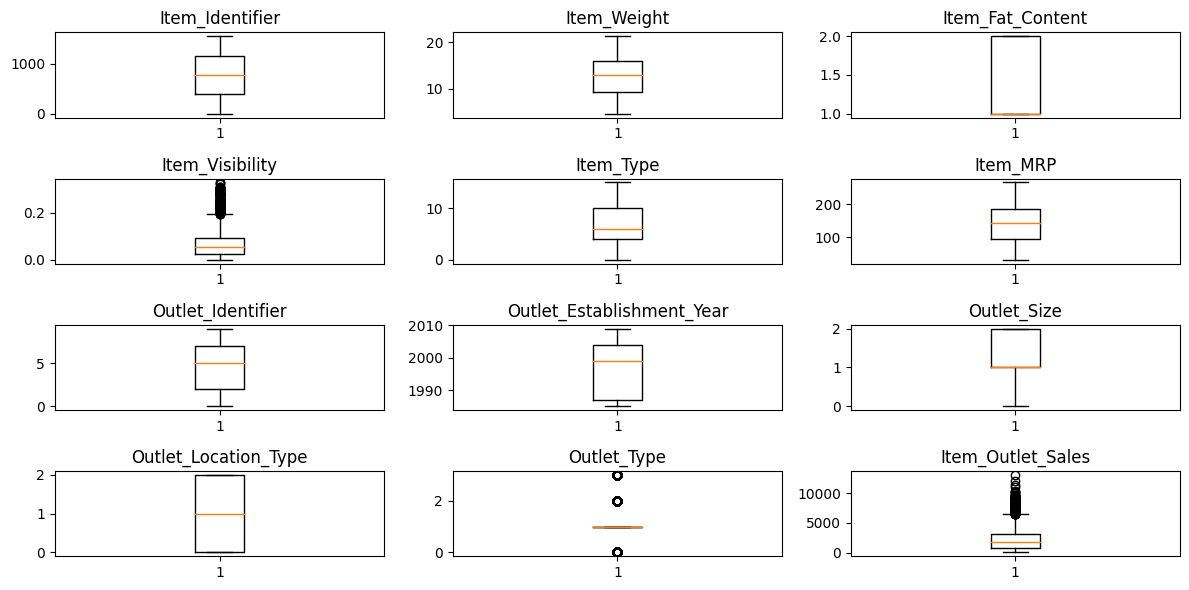

In [ ]:
def plots_per_colounm_for_outlier(df):
    fig,ax = plt.subplots(4,3 ,figsize=(12, 6))
    columns = df.columns
    counter = 0

    for i in range(0,4):
        for j in range(0,3):

            ax[i,j].boxplot(df[columns[counter]])
            ax[i,j].set_title(columns[counter])
            counter += 1

    fig.tight_layout()



plots_per_colounm_for_outlier(df)


 Outlier are avialble in this dataset in some columns Item_Fat_Content,Item_Visiblity, Item_Outlet_Sales, Outlet_Type. Now we will check with percentage how much outliers.

In [ ]:
from scipy import stats


In [ ]:
def check_outlier_percentage(df):
    thersold = 3
    rows = (df.shape)[0]
    
    print("Percentage of outlier in per column")
    for c in df.columns:
        z = np.abs(stats.zscore(df[c]))
        idxs = np.where(z>thersold)[0]
        per = round((len(idxs)/rows)*100,2)
        print(c,f"total outlier {len(idxs)} and percentage {per}")

    


check_outlier_percentage(df)        
    

Percentage of outlier in per column
Item_Identifier total outlier 0 and percentage 0.0
Item_Weight total outlier 0 and percentage 0.0
Item_Fat_Content total outlier 0 and percentage 0.0
Item_Visibility total outlier 95 and percentage 1.11
Item_Type total outlier 0 and percentage 0.0
Item_MRP total outlier 0 and percentage 0.0
Outlet_Identifier total outlier 0 and percentage 0.0
Outlet_Establishment_Year total outlier 0 and percentage 0.0
Outlet_Size total outlier 0 and percentage 0.0
Outlet_Location_Type total outlier 0 and percentage 0.0
Outlet_Type total outlier 0 and percentage 0.0
Item_Outlet_Sales total outlier 90 and percentage 1.06


In [ ]:
# dulicate check
df.duplicated().sum()


0

In [ ]:
# As it outlier percentage per column we are getting less than 5 percentage thats why we are removed 

def remove_outlier_per_column_above_thersold_z(df):
    thersold = 3
   
    print("Removing of outlier in per column")
    

    for c in df.columns:
        df.reset_index()
        z = np.abs(stats.zscore(df[c]))
        idxs = np.where(z>=thersold)[0]
        df.drop(index=[df.index[id] for id in idxs],inplace=True)

    total_idx = 0
    for c in df.columns:
        df.reset_index()
        z = np.abs(stats.zscore(df[c]))
        idxs = np.where(z>=thersold)[0]
        total_idx += len(idxs)
        
    if total_idx > 0:
        remove_outlier_per_column_above_thersold_z(df)   

            

        

df_copy = df.copy()

remove_outlier_per_column_above_thersold_z(df_copy)
print(df_copy.shape,df.shape)

check_outlier_percentage(df_copy)



Removing of outlier in per column
Removing of outlier in per column
Removing of outlier in per column
Removing of outlier in per column
Removing of outlier in per column
(8225, 12) (8523, 12)
Percentage of outlier in per column
Item_Identifier total outlier 0 and percentage 0.0
Item_Weight total outlier 0 and percentage 0.0
Item_Fat_Content total outlier 0 and percentage 0.0
Item_Visibility total outlier 0 and percentage 0.0
Item_Type total outlier 0 and percentage 0.0
Item_MRP total outlier 0 and percentage 0.0
Outlet_Identifier total outlier 0 and percentage 0.0
Outlet_Establishment_Year total outlier 0 and percentage 0.0
Outlet_Size total outlier 0 and percentage 0.0
Outlet_Location_Type total outlier 0 and percentage 0.0
Outlet_Type total outlier 0 and percentage 0.0
Item_Outlet_Sales total outlier 0 and percentage 0.0


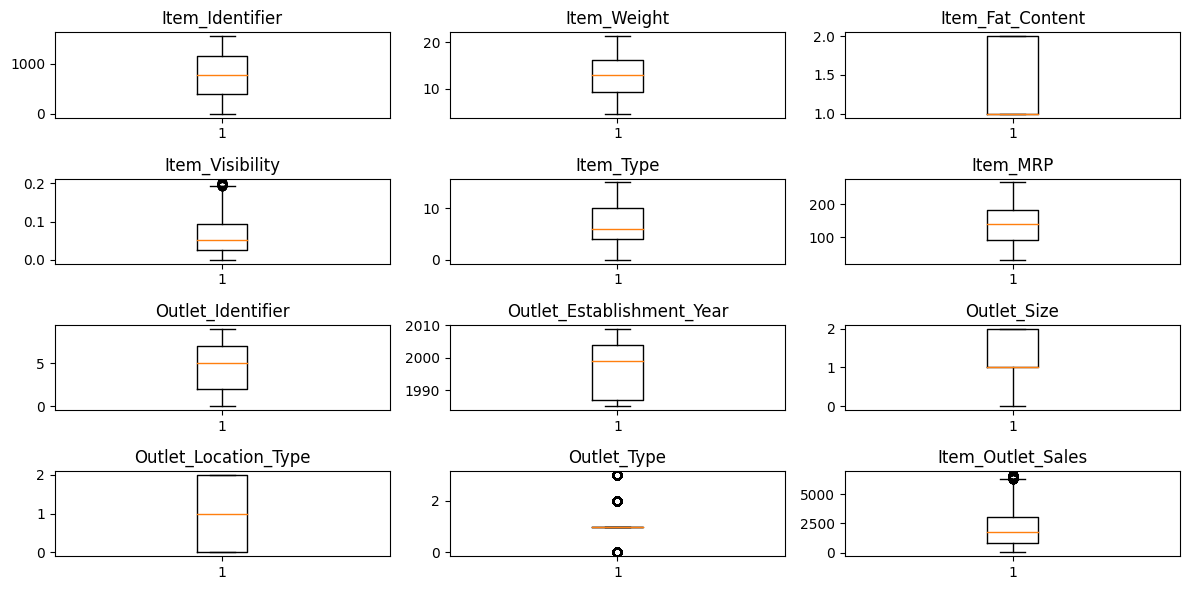

In [ ]:
plots_per_colounm_for_outlier(df_copy)

In [ ]:
def remove_outlier_using_IQR(df):
    for c in df.columns:
        ''' Detection '''
        df.reset_index()   
        # IQR
        Q1 = np.percentile(df[c], 25,
                        method = 'midpoint')
        
        Q3 = np.percentile(df[c], 75,
                        method = 'midpoint')
        IQR = Q3 - Q1
        
        print("Old Shape: ", df.shape)
        
        # Upper bound
        upper = np.where(df[c] >= (Q3+1.5*IQR))
        # Lower bound
        lower = np.where(df[c] <= (Q1-1.5*IQR))
        
        ''' Removing the Outliers '''
        for id in upper[0]:
             df.drop(id, inplace = True,errors='ignore')
             
        for id in lower[0]:
             df.drop(id, inplace = True,errors='ignore')
        
        print("New Shape: ", df.shape)

dfc = df.copy()  
   

remove_outlier_using_IQR(dfc)

Old Shape:  (8523, 12)
New Shape:  (8523, 12)
Old Shape:  (8523, 12)
New Shape:  (8523, 12)
Old Shape:  (8523, 12)
New Shape:  (8406, 12)
Old Shape:  (8406, 12)
New Shape:  (8264, 12)
Old Shape:  (8264, 12)
New Shape:  (8264, 12)
Old Shape:  (8264, 12)
New Shape:  (8264, 12)
Old Shape:  (8264, 12)
New Shape:  (8264, 12)
Old Shape:  (8264, 12)
New Shape:  (8264, 12)
Old Shape:  (8264, 12)
New Shape:  (8264, 12)
Old Shape:  (8264, 12)
New Shape:  (8264, 12)
Old Shape:  (8264, 12)
New Shape:  (255, 12)
Old Shape:  (255, 12)
New Shape:  (255, 12)


In [ ]:
dfc.shape

(255, 12)

Use outlier removal technique with z square because in IQR we loss so much data

In [ ]:
df_copy.shape

(8225, 12)

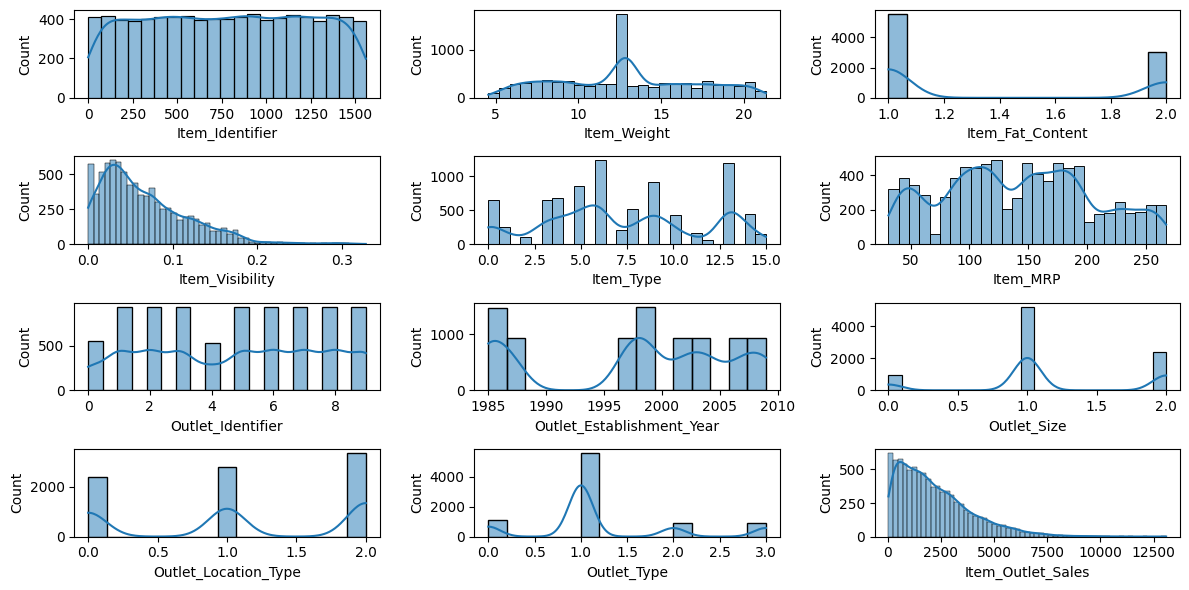

In [ ]:
def dist_plots_per_colounm(df):
    fig,ax = plt.subplots(4,3 ,figsize=(12, 6))
    columns = df.columns
    counter = 0

    for i in range(0,4):
        for j in range(0,3):
            if counter < len(columns):
                sns.histplot(df[columns[counter]],ax=ax[i,j],kde=True,)
                counter += 1

    fig.tight_layout()



dist_plots_per_colounm(df)

In [ ]:
df_copy.corrwith(df_copy['Item_Outlet_Sales'])


Item_Identifier              0.003265
Item_Weight                  0.011716
Item_Fat_Content             0.026152
Item_Visibility             -0.077504
Item_Type                    0.018250
Item_MRP                     0.566005
Outlet_Identifier            0.164206
Outlet_Establishment_Year   -0.009882
Outlet_Size                 -0.074671
Outlet_Location_Type         0.057472
Outlet_Type                  0.353855
Item_Outlet_Sales            1.000000
dtype: float64

In [ ]:
# remove no correlation colum with Item_Outlet_Sales 
round(df_copy.corr() * 100) == 0 


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
Item_Identifier,False,False,False,False,False,False,False,False,True,True,True,True
Item_Weight,False,False,False,False,False,False,False,False,False,False,True,False
Item_Fat_Content,False,False,False,False,False,False,False,True,True,True,False,False
Item_Visibility,False,False,False,False,False,True,False,False,False,False,False,False
Item_Type,False,False,False,False,False,False,True,False,True,True,True,False
Item_MRP,False,False,False,True,False,False,True,False,False,False,False,False
Outlet_Identifier,False,False,False,False,True,True,False,False,False,False,False,False
Outlet_Establishment_Year,False,False,True,False,False,False,False,False,False,False,False,False
Outlet_Size,True,False,True,False,True,False,False,False,False,False,False,False
Outlet_Location_Type,True,False,True,False,True,False,False,False,False,False,False,False


In [ ]:
round(df_copy.corr() * 100) 

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
Item_Weight,100.0,-2.0,-1.0,3.0,3.0,-1.0,-1.0,-1.0,1.0,-0.0,1.0
Item_Fat_Content,-2.0,100.0,5.0,-14.0,1.0,1.0,0.0,-0.0,-0.0,1.0,3.0
Item_Visibility,-1.0,5.0,100.0,-4.0,0.0,-6.0,-4.0,4.0,-1.0,-10.0,-8.0
Item_Type,3.0,-14.0,-4.0,100.0,3.0,-0.0,1.0,-0.0,0.0,0.0,2.0
Item_MRP,3.0,1.0,0.0,3.0,100.0,-0.0,3.0,1.0,-1.0,-3.0,57.0
Outlet_Identifier,-1.0,1.0,-6.0,-0.0,-0.0,100.0,8.0,51.0,-73.0,8.0,16.0
Outlet_Establishment_Year,-1.0,0.0,-4.0,1.0,3.0,8.0,100.0,21.0,-9.0,-11.0,-1.0
Outlet_Size,-1.0,-0.0,4.0,-0.0,1.0,51.0,21.0,100.0,-61.0,-19.0,-7.0
Outlet_Location_Type,1.0,-0.0,-1.0,0.0,-1.0,-73.0,-9.0,-61.0,100.0,47.0,6.0
Outlet_Type,-0.0,1.0,-10.0,0.0,-3.0,8.0,-11.0,-19.0,47.0,100.0,35.0


In [ ]:
df_copy.drop(labels= 'Item_Identifier',axis=1,inplace=True)

In [ ]:
df_copy.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,9.30,1,0.016047,4,249.8092,9,1999,1,0,1,3735.1380
1,5.92,2,0.019278,14,48.2692,3,2009,1,2,2,443.4228
2,17.50,1,0.016760,10,141.6180,9,1999,1,0,1,2097.2700
3,19.20,2,0.000000,6,182.0950,0,1998,1,2,0,732.3800
4,8.93,1,0.000000,9,53.8614,1,1987,0,2,1,994.7052


In [ ]:
# remove above 95 correlation colum with Item_Outlet_Sales  or check high corelation data with mutual column
round(df_copy.corr() * 100) > 95 

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
Item_Weight,True,False,False,False,False,False,False,False,False,False,False
Item_Fat_Content,False,True,False,False,False,False,False,False,False,False,False
Item_Visibility,False,False,True,False,False,False,False,False,False,False,False
Item_Type,False,False,False,True,False,False,False,False,False,False,False
Item_MRP,False,False,False,False,True,False,False,False,False,False,False
Outlet_Identifier,False,False,False,False,False,True,False,False,False,False,False
Outlet_Establishment_Year,False,False,False,False,False,False,True,False,False,False,False
Outlet_Size,False,False,False,False,False,False,False,True,False,False,False
Outlet_Location_Type,False,False,False,False,False,False,False,False,True,False,False
Outlet_Type,False,False,False,False,False,False,False,False,False,True,False


In [ ]:
round(df_copy.corr() * 100)

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
Item_Weight,100.0,-2.0,-1.0,3.0,3.0,-1.0,-1.0,-1.0,1.0,-0.0,1.0
Item_Fat_Content,-2.0,100.0,5.0,-14.0,1.0,1.0,0.0,-0.0,-0.0,1.0,3.0
Item_Visibility,-1.0,5.0,100.0,-4.0,0.0,-6.0,-4.0,4.0,-1.0,-10.0,-8.0
Item_Type,3.0,-14.0,-4.0,100.0,3.0,-0.0,1.0,-0.0,0.0,0.0,2.0
Item_MRP,3.0,1.0,0.0,3.0,100.0,-0.0,3.0,1.0,-1.0,-3.0,57.0
Outlet_Identifier,-1.0,1.0,-6.0,-0.0,-0.0,100.0,8.0,51.0,-73.0,8.0,16.0
Outlet_Establishment_Year,-1.0,0.0,-4.0,1.0,3.0,8.0,100.0,21.0,-9.0,-11.0,-1.0
Outlet_Size,-1.0,-0.0,4.0,-0.0,1.0,51.0,21.0,100.0,-61.0,-19.0,-7.0
Outlet_Location_Type,1.0,-0.0,-1.0,0.0,-1.0,-73.0,-9.0,-61.0,100.0,47.0,6.0
Outlet_Type,-0.0,1.0,-10.0,0.0,-3.0,8.0,-11.0,-19.0,47.0,100.0,35.0


In [ ]:
# from pandas_profiling import ProfileReport
# pr = ProfileReport(df)
# pr.to_file("report.html")


In [ ]:
# remove +-5% only corelation with Item_Outlet_Sales
df_copy.drop(columns= ['Item_Weight',"Item_Fat_Content","Item_Type","Outlet_Establishment_Year",],axis=1,inplace=True)
df_copy.head()

,Item_Visibility,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,0.016047,249.8092,9,1,0,1,3735.1380
1,0.019278,48.2692,3,1,2,2,443.4228
2,0.016760,141.6180,9,1,0,1,2097.2700
3,0.000000,182.0950,0,1,2,0,732.3800
4,0.000000,53.8614,1,0,2,1,994.7052


### Experiement with differrent transformation 
some assumpation its will be give good result : Robust scaler(more outlier in dataset according to IQR ), Quantile transformer scaler other we will see according to experiment 

## Standardization of data

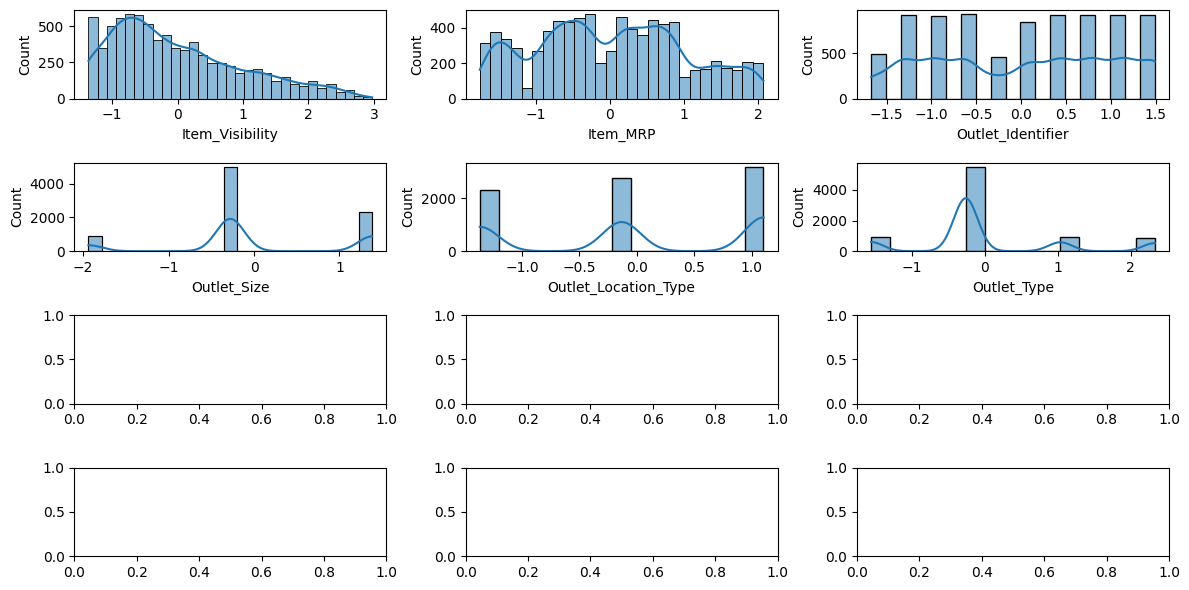

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
data = scaler.fit_transform(df_copy[df_copy.columns[:-1]])

transform_data = pd.DataFrame(data,columns=df_copy.columns[:-1])

dist_plots_per_colounm(transform_data)

## Robust Scaler 

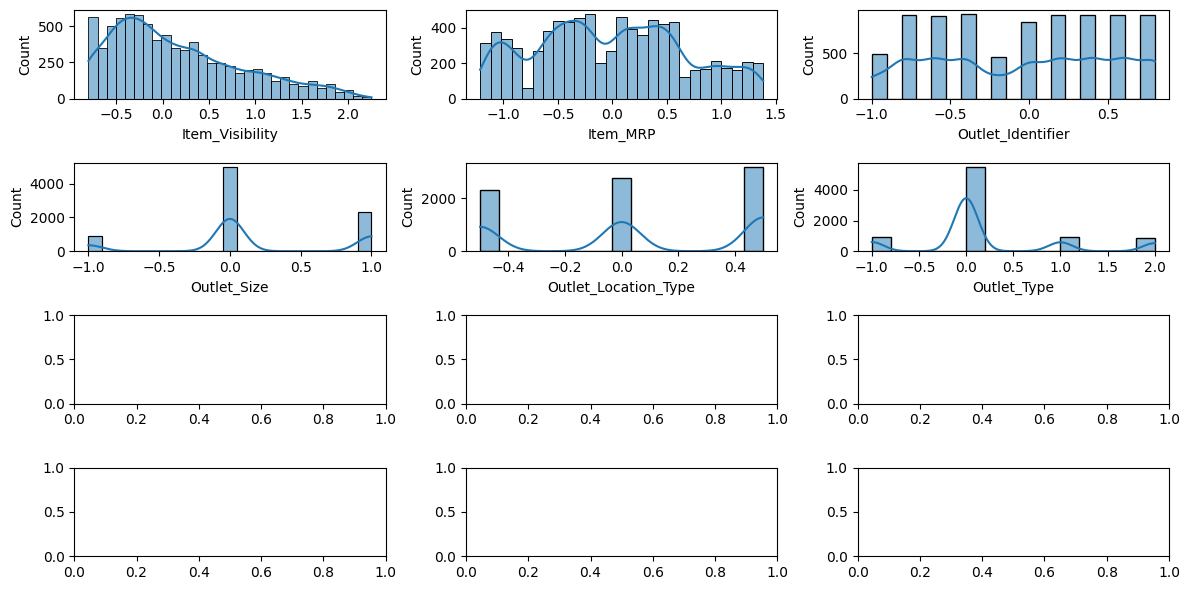

In [ ]:
from sklearn.preprocessing import RobustScaler
transformer = RobustScaler()
data = transformer.fit_transform(df_copy[df_copy.columns[:-1]])
transform_data = pd.DataFrame(data,columns=df_copy.columns[:-1])

dist_plots_per_colounm(transform_data)


## Log transformation

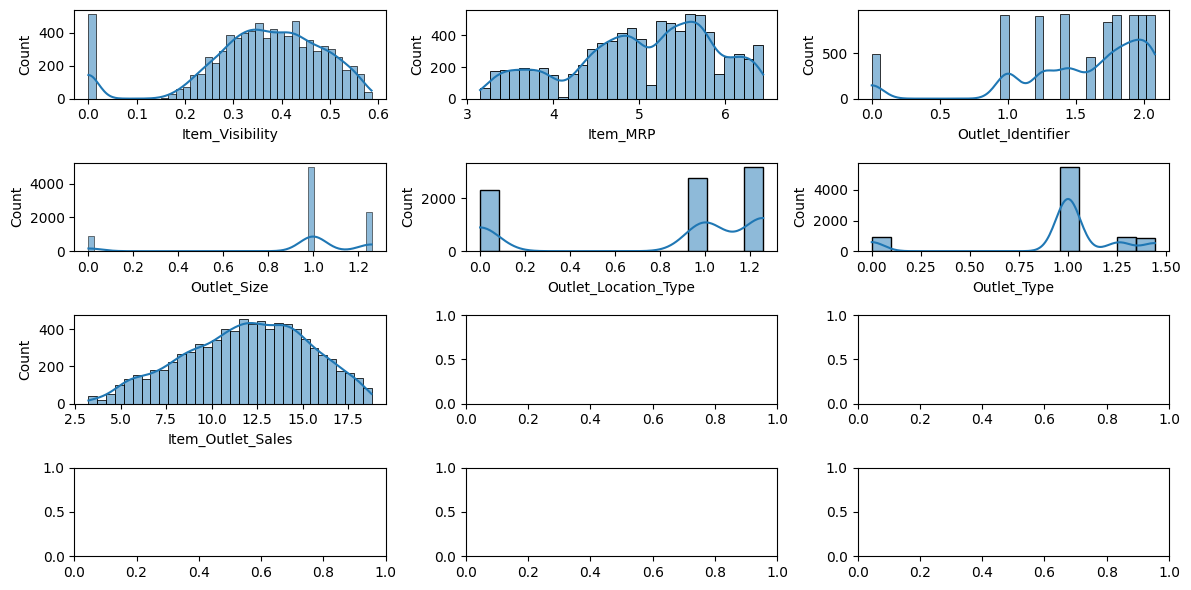

In [ ]:
data = np.cbrt(df_copy)

dist_plots_per_colounm(data)


## Square Root Transformation

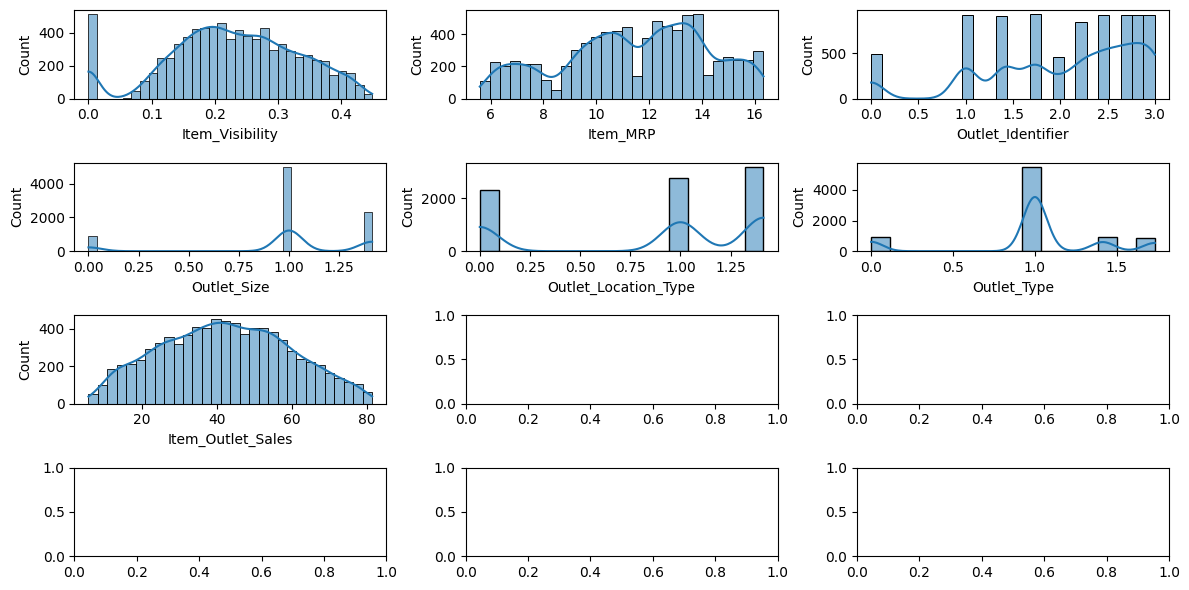

In [ ]:
data = np.sqrt(df_copy)
dist_plots_per_colounm(data)

## Power transformation

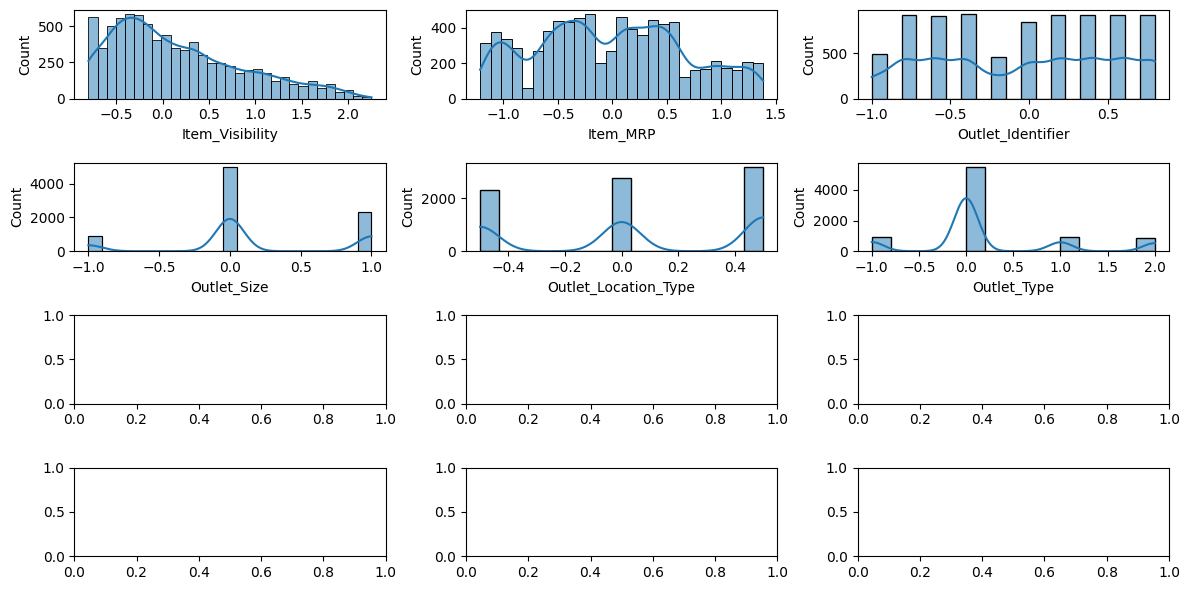

In [ ]:
from sklearn.preprocessing import PowerTransformer
pt = PowerTransformer()
data = pt.fit_transform(df_copy)
transformed_data  = pd.DataFrame(data,columns=df_copy.columns)
dist_plots_per_colounm(transform_data)

## Quantile transformer

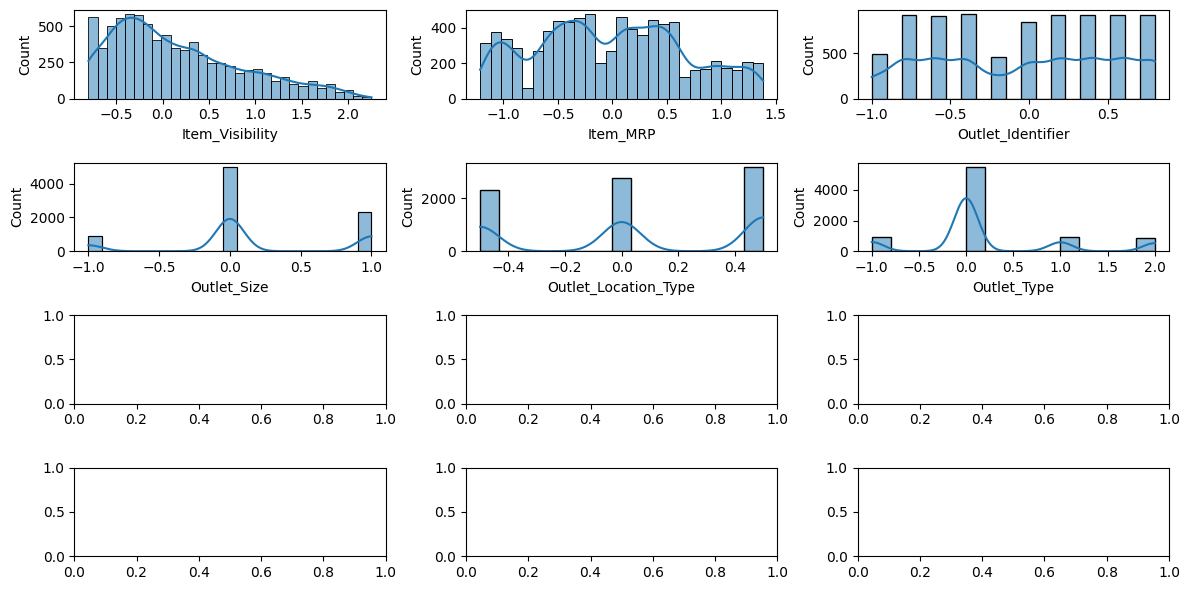

In [ ]:
from sklearn.preprocessing import QuantileTransformer
pt = QuantileTransformer()
data = pt.fit_transform(df_copy)
transformed_data  = pd.DataFrame(data,columns=df_copy.columns)
dist_plots_per_colounm(transform_data)

Nothing will works for understand the pattern we use for optimization of as StandardScaler

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
data = scaler.fit_transform(df_copy[df_copy.columns[0:-1]])

transform_data = pd.DataFrame(data,columns=df_copy.columns[0:-1])

In [ ]:
df_copy.columns

Index(['Item_Visibility', 'Item_MRP', 'Outlet_Identifier', 'Outlet_Size',
       'Outlet_Location_Type', 'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [ ]:
X =  transform_data[df_copy.columns[0:-1]]
y = df_copy['Item_Outlet_Sales']


In [ ]:
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import train_test_split

ss = ShuffleSplit(n_splits=5, test_size=0.15, random_state=0)
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.33,random_state=85)


In [ ]:
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score
def sampling_fit_and_test(algo):
    avg_perf = 0
    total_perf = 0

    for train_index, test_index in ss.split(X, y):
        print("TRAIN:", train_index, "TEST:", test_index)
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]

        algo.fit(X_train,y_train.iloc[:,1])
        predict_data = algo.predict(X_test)
        perf = r2_score(predict_data,y_test)
        print("r2",perf)
        total_perf += perf


    avg_perf = total_perf / ss.n_splits
    print("avg_perf_r2",avg_perf)



def evaluate_model(algo):
    algo.fit(X_train,y_train)
    pred = algo.predict(X_test)
    print("r2 square",r2_score(y_test,pred))

def own_cross_val_score(model):
    scores = cross_val_score(model, X, y, cv=5)
    print(f"cross val score mean {scores.mean()} std {scores.std()}" )    



    




Now We will experiment on ML algorithms 

In [ ]:
from sklearn.linear_model import ElasticNet

regr = ElasticNet(random_state=0)

evaluate_model(regr)
own_cross_val_score(regr)

r2 square 0.4301752064800326
cross val score mean 0.4309004110025209 std 0.005451767889507608


In [ ]:
from sklearn.svm import SVR
svr = SVR(C=1, epsilon=0.1)
evaluate_model(svr)
own_cross_val_score(svr)

r2 square 0.09318829232453585
cross val score mean 0.12031272057723627 std 0.008820521388012566


In [ ]:
from sklearn.neighbors import KNeighborsRegressor
reg = KNeighborsRegressor(n_neighbors=2)
evaluate_model(reg)

r2 square 0.3874348620886141


In [ ]:
from sklearn.tree import DecisionTreeRegressor
reg = DecisionTreeRegressor(random_state=0)
evaluate_model(reg)
own_cross_val_score(reg)

r2 square 0.17003717673723018
cross val score mean 0.13901450166760126 std 0.03850966535895103


In [ ]:
from sklearn.ensemble import AdaBoostRegressor
regr = AdaBoostRegressor(random_state=0, n_estimators=100)
evaluate_model(regr)
own_cross_val_score(regr)

r2 square 0.520317604559877
cross val score mean 0.5287410748299126 std 0.012180205560616825


In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
regr = AdaBoostRegressor(random_state=0)
evaluate_model(regr) 
own_cross_val_score(regr)

r2 square 0.520317604559877
cross val score mean 0.5287410748299126 std 0.012180205560616825


In [ ]:
import xgboost as xg 
from sklearn.metrics import mean_absolute_error as MAE, mean_squared_error as MSE
train_dmatrix = xg.DMatrix(data = X_train, label = y_train)
test_dmatrix = xg.DMatrix(data = X_test, label = y_test)
  
# Parameter dictionary specifying base learner
param = {"booster":"gblinear", "objective":"reg:linear"}
  
xgb_r = xg.train(params = param, dtrain = train_dmatrix, num_boost_round = 10)
pred = xgb_r.predict(test_dmatrix)
  
# RMSE Computation
rmse = np.sqrt(MSE(y_test, pred))
print("RMSE : % f" %(rmse))

r2_score(y_test,pred)


[21:14:04] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
RMSE :  1095.151565


0.49060292366221314

In [ ]:
xgr = xg.XGBRegressor()
own_cross_val_score(xgr)

cross val score mean 0.51474034989566 std 0.016470783933361377


In [ ]:
from sklearn.linear_model import HuberRegressor
reg = HuberRegressor()
evaluate_model(reg)
own_cross_val_score(reg)

r2 square 0.4878732043409185
cross val score mean 0.48590179602927125 std 0.008864398280027627


In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
model = Pipeline([('poly', PolynomialFeatures(degree=3,interaction_only=False)),
                  ('linear', LinearRegression(fit_intercept=True))])

evaluate_model(model)
own_cross_val_score(model)                  

r2 square 0.5813050612318855
cross val score mean 0.5841622143552964 std 0.010061466320616592


In [ ]:
from sklearn.ensemble import RandomForestRegressor
regr = RandomForestRegressor(max_depth=5, random_state=0)
evaluate_model(regr)
own_cross_val_score(regr) 

r2 square 0.5759364409249577
cross val score mean 0.5779943088225792 std 0.010975160145753718


we do some EDA to know its what have test data describe bcz we dont want so much different from train data its not good to see test cases but we try as for exprimentation

In [ ]:
test_df = pd.read_csv("archive (5)/Test.csv")

In [ ]:
test_df.isnull().sum()


Item_Identifier                 0
Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

In [ ]:
test_df.shape


(5681, 11)

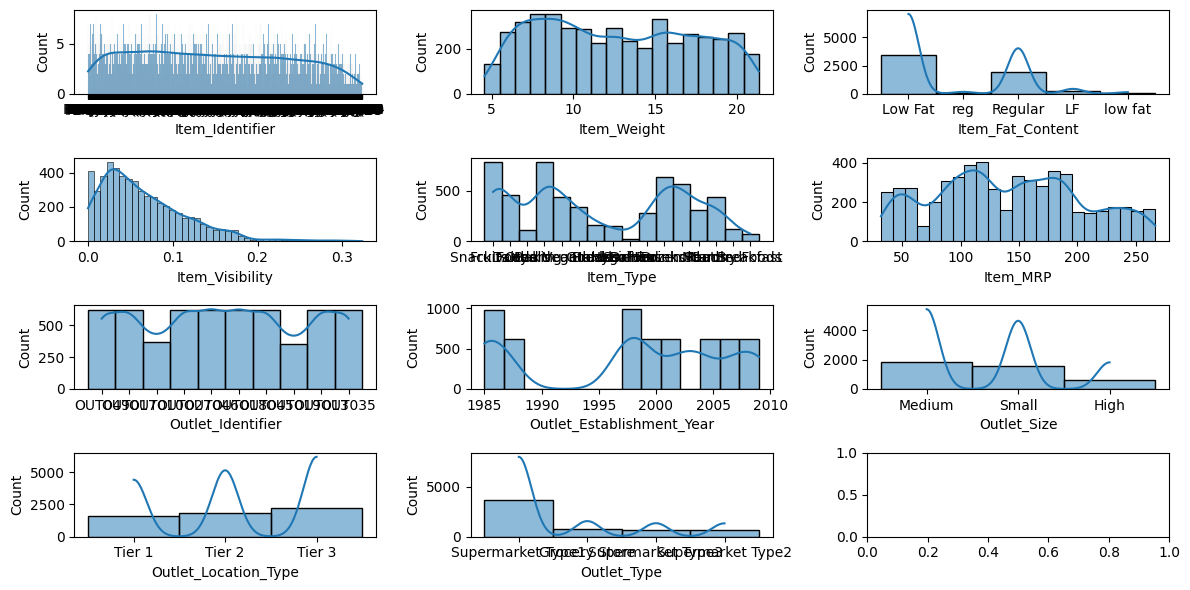

In [ ]:
dist_plots_per_colounm(test_df) 


In [ ]:
def show_value_count(pos):
    col = test_df.columns[pos]
    print(col)
    dc = test_df[col]
    if dc.dtypes=="O":
        print(dc.value_counts())
    else:
        print("not category colunm")

In [ ]:
['Item_Weight', 'Item_Fat_Content', 'Item_Visibility', 'Item_Type',
       'Item_MRP', 'Outlet_Identifier', 'Outlet_Establishment_Year',
       'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type',
       'Item_Outlet_Sales'],
test_df.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type'],
      dtype='object')

In [ ]:
show_value_count(0)


Item_Identifier
DRF48    8
FDZ50    8
FDQ60    8
FDN52    8
FDW10    8
        ..
FDW49    1
FDG38    1
FDD38    1
FDA15    1
FDF04    1
Name: Item_Identifier, Length: 1543, dtype: int64


In [ ]:
show_value_count(2)


Item_Fat_Content
Low Fat    3396
Regular    1935
LF          206
reg          78
low fat      66
Name: Item_Fat_Content, dtype: int64


In [ ]:
show_value_count(4)


Item_Type
Snack Foods              789
Fruits and Vegetables    781
Household                638
Frozen Foods             570
Dairy                    454
Baking Goods             438
Canned                   435
Health and Hygiene       338
Meat                     311
Soft Drinks              281
Breads                   165
Hard Drinks              148
Starchy Foods            121
Others                   111
Breakfast                 76
Seafood                   25
Name: Item_Type, dtype: int64


In [ ]:
show_value_count(6)


Outlet_Identifier
OUT027    624
OUT013    621
OUT049    620
OUT046    620
OUT035    620
OUT045    619
OUT018    618
OUT017    617
OUT010    370
OUT019    352
Name: Outlet_Identifier, dtype: int64


In [ ]:
show_value_count(8)


Outlet_Size
Medium    1862
Small     1592
High       621
Name: Outlet_Size, dtype: int64


In [ ]:
show_value_count(9)


Outlet_Location_Type
Tier 3    2233
Tier 2    1856
Tier 1    1592
Name: Outlet_Location_Type, dtype: int64


In [ ]:
show_value_count(10)


Outlet_Type
Supermarket Type1    3717
Grocery Store         722
Supermarket Type3     624
Supermarket Type2     618
Name: Outlet_Type, dtype: int64


untill we didnot see unexpected data we will assumption our model give good result

In [ ]:
test_df[test_df.columns[2]] = test_df[test_df.columns[2]].map({"LF":1,"reg":2,"low fat":1,"Low Fat":1,"Regular":2})


In [ ]:
test_df[test_df.columns[2]].head()

0    1
1    2
2    1
3    1
4    2
Name: Item_Fat_Content, dtype: int64

In [ ]:
test_df.Outlet_Size.fillna(test_df.Outlet_Size.mode()[0],inplace=True)
test_df.Outlet_Size.head()

0    Medium
1    Medium
2    Medium
3    Medium
4    Medium
Name: Outlet_Size, dtype: object

In [ ]:
for c in test_df.columns:
    if test_df[c].dtype=='O':
        label_encoder = preprocessing.LabelEncoder()
        test_df[c]= label_encoder.fit_transform(test_df[c])

In [ ]:
test_df.Item_Weight.fillna(test_df.Item_Weight.mean(),inplace=True)


In [ ]:
test_df.Item_Weight.isna().sum()


0

In [ ]:
test_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5681 entries, 0 to 5680
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            5681 non-null   int32  
 1   Item_Weight                5681 non-null   float64
 2   Item_Fat_Content           5681 non-null   int64  
 3   Item_Visibility            5681 non-null   float64
 4   Item_Type                  5681 non-null   int32  
 5   Item_MRP                   5681 non-null   float64
 6   Outlet_Identifier          5681 non-null   int32  
 7   Outlet_Establishment_Year  5681 non-null   int64  
 8   Outlet_Size                5681 non-null   int32  
 9   Outlet_Location_Type       5681 non-null   int32  
 10  Outlet_Type                5681 non-null   int32  
dtypes: float64(3), int32(6), int64(2)
memory usage: 355.2 KB


In [ ]:
test_df.isna().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
dtype: int64

In [ ]:
test_df.drop(columns= ['Item_Weight','Item_Identifier',"Item_Fat_Content","Item_Type","Outlet_Establishment_Year",],axis=1,inplace=True)
test_df.head()

,Item_Visibility,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,0.007565,107.8622,9,1,0,1
1,0.038428,87.3198,2,1,1,1
2,0.099575,241.7538,0,1,2,0
3,0.015388,155.0340,2,1,1,1
4,0.118599,234.2300,5,1,2,3


In [ ]:
model.predict(test_df)

array([2.52096674e+18, 4.17839694e+18, 3.59029367e+18, ...,
       5.84640094e+18, 1.00293195e+19, 4.05687898e+18])